In [1]:
import cv2
import math
import os
import scipy.io.wavfile
import utils

from pyAudioAnalysis import audioBasicIO
from pyAudioAnalysis import audioFeatureExtraction
from pyAudioAnalysis import audioSegmentation

from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

C:\Users\PC\Anaconda3\envs\TensorFlow-GPU-Keras\lib\site-packages\pydub\utils.py:165: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


In [2]:
params = utils.yaml_to_dict('config.yml')

## Audio Plot

In [3]:
sample_audio_path = os.path.join(params['data_dir'],'audios','Acelera','E-acelera_1.wav')
Fs, x = audioBasicIO.readAudioFile(sample_audio_path)
t=np.linspace(0,len(x)/Fs,len(x))
plt.plot(t,x)

Error: file not found or other I/O error. (DECODING FAILED)


TypeError: object of type 'int' has no len()

## Utils functions

In [4]:
def MySpectrogram(x,ven,inc):
    Nven = math.floor(len(x)/inc) - 1
    Ventanas = np.zeros((Nven,ven))
    Spectrogram = np.zeros((Nven,512))
    ini = 0
    for i in range(Nven):
        Ventanas[i,:]=x[ini:ini+ven]
        ini += inc
        temp = 10*np.log(np.abs(np.fft.fft(Ventanas[i,:],n=1024))**2)
        Spectrogram[i,:]=temp[:512]
    return Spectrogram

def rescaled_signal(x):
    
    scaler = MinMaxScaler()
    
    reshaped_signal = np.reshape(x,(-1,1)).astype(float)
    rescaled_signal = scaler.fit_transform(reshaped_signal)

    original_shape = np.reshape(rescaled_signal,(-1,))
    
    return original_shape

## PyAudioAnalisis Spectogram Function and plot

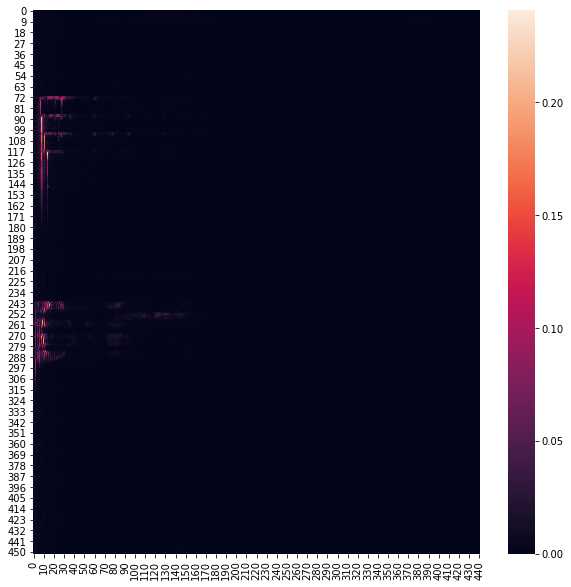

In [5]:
sample_audio_path = os.path.join(params['data_dir'],'audios','Acelera','E-acelera_1.wav')

[fs, x] = audioBasicIO.readAudioFile(sample_audio_path)
x = audioBasicIO.stereo2mono(x)
x = rescaled_signal(x)

specgram, TimeAxis, FreqAxis = audioFeatureExtraction.stSpectogram(
    x[:200000], 
    fs, 
    round(fs * 0.02),
    round(fs * 0.01), 
    False)

fig, axis = plt.subplots(figsize=(10,10))
sns.heatmap(specgram)

## My Spectogram Function and Plot

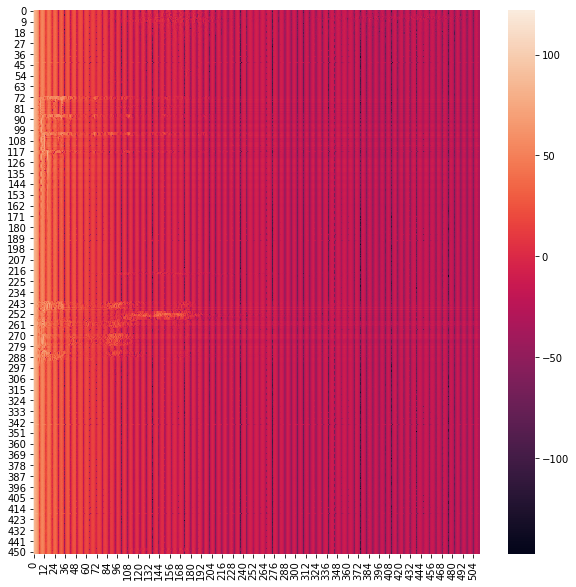

In [6]:
sample_audio_path = os.path.join(params['data_dir'],'audios','Acelera','E-acelera_1.wav')

[fs, x] = audioBasicIO.readAudioFile(sample_audio_path)
x = audioBasicIO.stereo2mono(x)
x = rescaled_signal(x)

Sp = MySpectrogram(x[:200000], round(fs * 0.02),round(fs * 0.01))

fig, axis = plt.subplots(figsize=(10,10))
sns.heatmap(Sp)

## Audios record list

In [7]:
records_list = list()
audios_path = os.path.join(params['data_dir'],'audios')
for root, dirs, files in os.walk(audios_path, topdown=False):
    for name in files:
        records_list.append(os.path.join(root, name))

## Some audio Spectograms

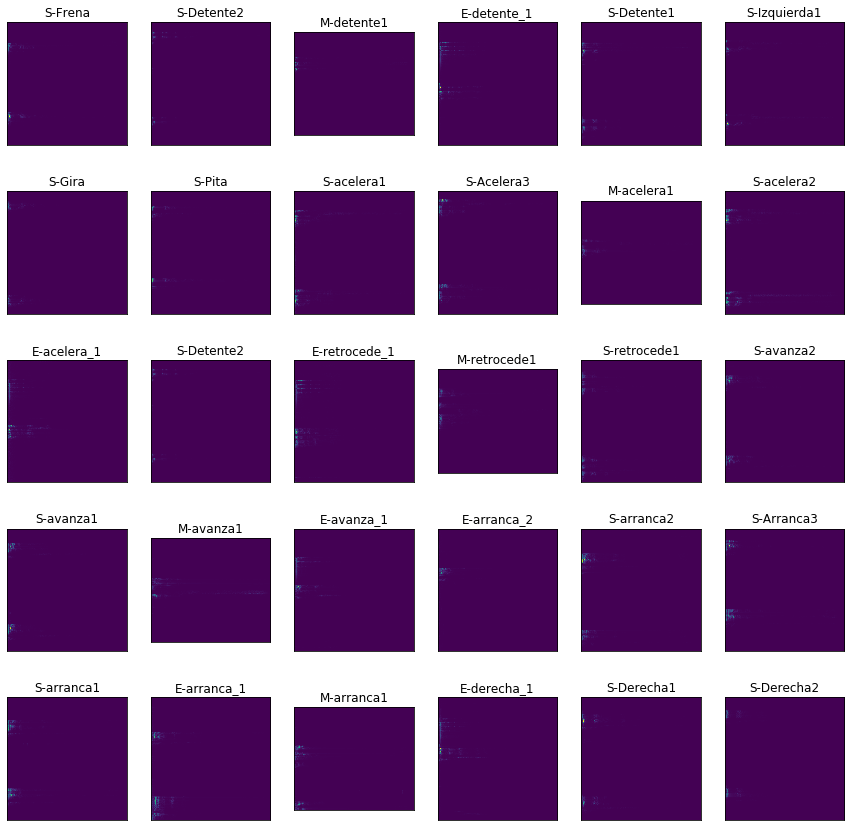

In [8]:
fig, axis = plt.subplots(5,6, figsize=(15,15))
k=0
for i in range(5):
    for j in range(6):
        
        audio = records_list[k]
        
        audio_name = os.path.splitext(audio)[0]
        audio_name = audio_name.split(os.path.sep)[-1]
        
        [fs, x] = audioBasicIO.readAudioFile(audio)
        x = audioBasicIO.stereo2mono(x)
        
        x = rescaled_signal(x)
    
        specgram, TimeAxis, FreqAxis = audioFeatureExtraction.stSpectogram(
            x[:200000], 
            fs, 
            round(fs * 0.02),
            round(fs * 0.01), 
            False
        )
        
        axis[i][j].imshow(specgram)
        axis[i][j].title.set_text(audio_name)
        
        axis[i][j].get_xaxis().set_visible(False)
        axis[i][j].get_yaxis().set_visible(False)
        
        k += 1
plt.show()

# Silence Removal

In [5]:
def _find_segments_from_audio(x, fs):
        
    segments = audioSegmentation.silenceRemoval(
        x, 
        fs, 
        0.020, 
        0.020, 
        smoothWindow = 1.0, 
        weight = 0.3, 
        plot = False)
    
    return segments

In [6]:
def _extract_audio_fragments(x, fs, segment):
    
    lower_lim, upper_lim = segment
    
    lower_lim = int(lower_lim*fs)
    upper_lim = int(upper_lim*fs)
    
    audio_segment = x[lower_lim:upper_lim]
    
    return audio_segment

## Plot with audio segments

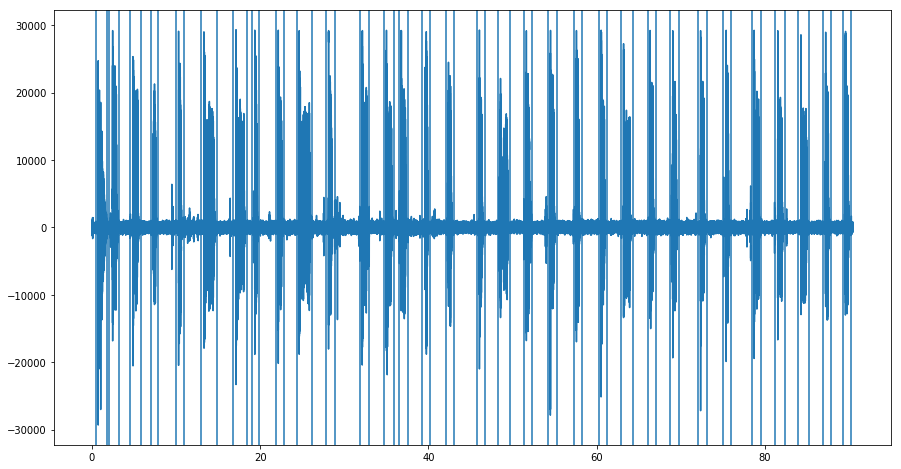

In [11]:
sample_audio_path = os.path.join(params['data_dir'],'audios','Acelera','E-acelera_1.wav')
[Fs, x] = audioBasicIO.readAudioFile(sample_audio_path)
segments = audioSegmentation.silenceRemoval(
    x, 
    Fs, 
    0.020, 
    0.020, 
    smoothWindow = 1.0, 
    weight = 0.3, 
    plot = False)

timeX = np.arange(0, x.shape[0] / float(Fs), 1.0 / Fs)


fig, axis = plt.subplots(1,1,figsize=(15,8))
plt.subplot(1, 1, 1)
plt.plot(timeX, x)
for s in segments:
    plt.axvline(x=s[0])
    plt.axvline(x=s[1])
plt.show()

In [13]:
sample_audio_path = os.path.join(params['data_dir'],'audios','Acelera','E-acelera_1.wav')

[fs, x] = audioBasicIO.readAudioFile(sample_audio_path)


x = audioBasicIO.stereo2mono(x)
x = rescaled_signal(x)

segments = _find_Segments_from_audio(x=x, fs=fs)
audio_fragment = _extract_audio_fragments(x=x, fs=fs, segment=segments[0])

## Audio Segment Plot

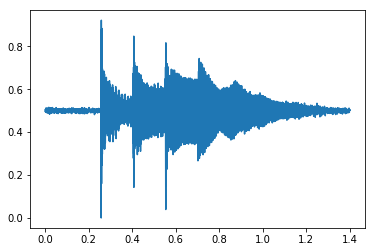

In [14]:
lower_lim, upper_lim = segments[0]

lower_lim = int(lower_lim*fs)
upper_lim = int(upper_lim*fs)

segment_len = len(x[lower_lim:upper_lim])
t=np.linspace(0,segment_len/fs,segment_len)
plt.plot(t, x[lower_lim:upper_lim])

## Spectogram From Audio Segment

(-0.5, 440.5, 138.5, -0.5)

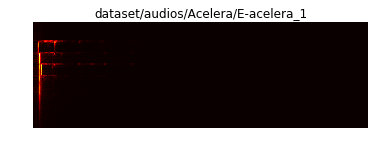

In [15]:
specgram, TimeAxis, FreqAxis = audioFeatureExtraction.stSpectogram(
    audio_fragment, 
    fs, 
    round(fs * 0.02),
    round(fs * 0.01), 
    False
)

audio_name = os.path.splitext(sample_audio_path)[0]

img = plt.imshow(specgram, interpolation='nearest')
img.set_cmap('hot')
plt.title(audio_name)
plt.axis('off')

### For save in local storage the audio dataset

In [66]:
import scipy.io.wavfile
scipy.io.wavfile.write(os.path.join(params['data_dir'],'Test.wav'), fs, x[lower_lim:upper_lim])

## Sliding Windows To The Audio

In [91]:
def _enframe(x, winlen, hoplen, frames):
    '''
    receives a 1D numpy array and divides it into frames.
    outputs a numpy matrix with the frames on the rows.
    '''
    x = np.squeeze(x)
    if len(x) < winlen:
        raise TypeError("Window size is bigger than record segment")
    if x.ndim != 1: 
        raise TypeError("Enframe input must be a 1-dimensional array.")
    
    n_frames = 1 + np.int(np.floor((len(x) - winlen) / float(hoplen)))
    
    while n_frames < frames:
        hoplen = int(hoplen * 0.8)
        n_frames = 1 + np.int(np.floor((len(x) - winlen) / float(hoplen)))
        
        
    xf = np.zeros((n_frames, winlen))
    for ii in range(n_frames):
        xf[ii] = x[ii * hoplen : ii * hoplen + winlen]
    
    return xf   

In [92]:
def _extract_trainable_frames(audio_fragment, params):
    
    windows_matrix = _enframe(audio_fragment,params['window_length'],params['shift_frames'],params['frames'])
    frames = params['frames']
    
    middle_frames = frames // 2
    
    windows_matrix_len = len(windows_matrix)
    
    if frames > windows_matrix_len:
        raise TypeError("There are not enough frames")

    if frames < windows_matrix_len:

        if (frames%2) == 0:
            lower_lim = (windows_matrix_len//2) - (middle_frames - 1)
        else:
            lower_lim = (windows_matrix_len//2) - middle_frames

        upper_lim = (windows_matrix_len//2) + middle_frames
        trainable_frames = windows_matrix[lower_lim-1:upper_lim,:]

    else:

        trainable_frames = windows_matrix
    
    return trainable_frames

In [93]:
def _save_audio_fragments(fragment_folder, audio_fragment, fs, name, index_name):
    
    if not os.path.exists(fragment_folder):
        os.makedirs(fragment_folder)

    name_wav = 'audio_fragment_' + os.path.splitext(name)[0] + '_segment' + str(index_name) + '_.wav'

    scipy.io.wavfile.write(
        os.path.join(fragment_folder,name_wav),
        fs,
        audio_fragment)

In [94]:
def _save_specgram_as_image(specgram_folder, specgram_matrix, name, index_name):
    
    if not os.path.exists(specgram_folder):
        os.makedirs(specgram_folder)

    imname = 'specgram_matrix_' + os.path.splitext(name)[0] + '_segment' + str(index_name) + '.jpg'
        
    fpath = os.path.join(specgram_folder, imname)
    cv2.imwrite(fpath, specgram_matrix)

In [95]:
params = utils.yaml_to_dict('config.yml')

In [96]:
audios_path = os.path.join(params['data_dir'],params['data_dir_audios'])
for root, dirs, files in os.walk(audios_path, topdown=False):
    
    for name in files:
        
        fragment_folder = os.path.join(params['data_dir'],params['data_dir_fragments'],root.split(os.path.sep)[-1])
        specgram_folder = os.path.join(params['data_dir'],params['data_dir_images'],root.split(os.path.sep)[-1])
        
        [fs, x] = audioBasicIO.readAudioFile(os.path.join(root, name))

        x = audioBasicIO.stereo2mono(x)
        x = rescaled_signal(x)

        segments = _find_segments_from_audio(x=x, fs=fs)
        
        for i,segment in enumerate(segments):
            
            audio_fragment = _extract_audio_fragments(x=x, fs=fs, segment=segment)
            
            if params['save_audio_fragments']:
                _save_audio_fragments(fragment_folder, audio_fragment, fs, name, i)
                
            trainable_frames = _extract_trainable_frames(audio_fragment, params)
            specgram_list = list()
            for frame in trainable_frames:
                
                specgram, TimeAxis, FreqAxis = audioFeatureExtraction.stSpectogram(
                    frame,
                    fs,
                    round(fs * 0.02),
                    round(fs * 0.01),
                    False
                )
                
                specgram = np.expand_dims(specgram,axis=2)
                specgram_list.append(specgram)
                
            specgram_matrix = np.concatenate((specgram_list),axis=2)
            _save_specgram_as_image(specgram_folder, specgram_matrix, name, i)